In [58]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn  import metrics
from scipy.spatial.distance import cdist
%matplotlib inline

#SOURCE: https://www.kaggle.com/uciml/iris

In [55]:
df = pd.read_csv("Iris.csv")
df.head(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa


Text(0.5, 1.0, 'KMeans Reference')

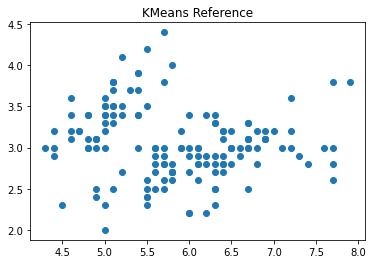

In [6]:
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"])
plt.title("KMeans Reference")    

In [38]:
my_centroids = np.array([[0,10], [0,10]])
km = KMeans(n_clusters=2, random_state=0, init=my_centroids, n_init=1, max_iter=2)
y_predicted = km.fit_predict(df[['SepalLengthCm','SepalWidthCm']])
y_predicted

print('First Iteration')
km.cluster_centers_

First Iteration


array([[5.6389313 , 3.05038168],
       [7.25263158, 3.07894737]])

In [39]:
df['cluster'] = y_predicted
df.head(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0


Text(0, 0.5, 'SepalWidthCm')

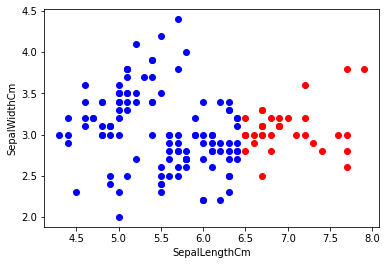

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color='blue')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], color='red')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

In [46]:
km.inertia_

77.05981576146777

In [51]:
# used to find the distance between observations within the cluster by calculating the sum of squares.
WCSS=[]

for i in range (1,9):
    km=KMeans(i)
    km.fit(df[['SepalLengthCm','SepalWidthCm']])
    WC=km.inertia_
    WCSS.append(WC)

In [52]:
WCSS

[130.18093333333334,
 57.982406042078765,
 37.12370212765957,
 27.961759657351315,
 20.97661980044561,
 17.207916182733257,
 14.749887516346064,
 12.772233169129724]

[]

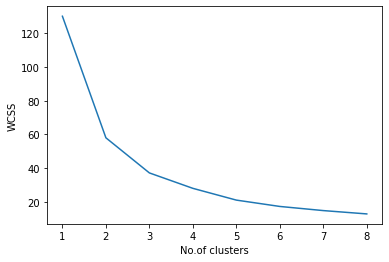

In [53]:
No_clusters=range(1,9)
plt.plot(No_clusters,WCSS)
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.plot()